# Projeto 2 - Investigando um conjunto de Dados

*Fundamentos de Data Science I*

*Udacity*

*João Rebouças*

# Sumário

1.Introdução

2.Apresentação dos Dados

3.Perguntas

4.Datawrangling

5.Análise dos Dados

6.Conclusão

7.Fontes




# 1. Introdução

Este Projeto consiste na análise de um conjunto de dados do **Titanic**, contendo dados demográficos e informações de 891 dos 2.224 passageiros e tripulantes a bordo do Titanic. 

O objetivo desse estudo é é entender se os fatores gênero e status socio-econômico influenciaram nas chances de sobrevivência dos passageiros.

Neste projeto, iremos analisar pontos relevantes do referido *dataset* utilizando as bibliotecas **pandas**, **numpy** e **matplotlib**.

As informações abaixo, retiradas do site Kaggle, ajudarão a entendermos melhor as informações fornecidas:


**Data Dictionary**


Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


**Variable Notes**


pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



# 2. Apresentação dos Dados

Abaixo são apresentados os dados, o que permitirá uma análise inicial dos mesmos. 

In [4]:
# Carregar bibliotecas pandas, numpy e matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Carregar o dataset
df = pd.read_csv('titanic.csv',sep=',')
# Visualizar como os dados estão organizados
df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# 3. Perguntas

A partir da análise inicial, as seguintes perguntas foram feitas:

1. Quantos passageiros sobreviveram e quantos morreram?

2. Qual era o número de passageiros em cada uma das classes?

3. Qual era o número de homens e mulheres abordo?

4. A classe na qual os passageiros viajavam influenciou em suas chances de sobrevivência?

5. O gênero dos passageiros influenciou em suas chances de sobrevivência?

6. Qual a relação dos fatores classe e gênero, combinados, nas chances de sobrevivência dos passageiros?

Tais perguntas foram selecionadas de forma a dimensionar qual o número de mortos e sobreviventes no navio, assim como quantos homens e mulheres estavam abordo e qual a classa na qual viajavam. 

Esse dimensionamento é importante para ajudar a alcançar os objetivos desse projeto, que é entender se fatores os fatores gênero e status socio-econômico influenciaram nas chances de sobrevivência dos passageiros. 


    

# 4. Datawrangling

Nesse tópico foi realizado um reconhecimento e limpeza dos dados.

Primeiramente, analisamos se existem colunas com valores vazio, a quantidade de valores vazios existentes e se existem valores duplicados. 



In [5]:
# Apresentar número de linhas e colunas do dataset
df.shape

(891, 12)

In [6]:
# recursos com valores faltantes
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
# verifique que colunas têm valores ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
# verifique se há dados duplicado
def has_duplicate(df):
   if df.duplicated().any():
       print("Possui {0} valores duplicados".format(df.duplicated().sum()))
   else:
       print("Não possui valores duplicados")
      
has_duplicate(df)

Não possui valores duplicados


Tendo em vista que iremos trabalhar principalmente com as variáveis 'Sex', 'Pclass' e 'Survided', iremos excluir colunas que não serão importantantes em nossa análise.

In [9]:
# descarte linhas com quaisquer valores nulos em ambos conjuntos de dados
df.drop('Embarked', axis=1, inplace=True)
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Fare', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.drop('Age', axis=1, inplace=True)





In [10]:
# verifique as mudanças após o uso do drop
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
dtypes: int64(3), object(2)
memory usage: 34.9+ KB


A tabela abaixo apresenta, então, apenas os dados de 'PassengerId', 'Survived', 'Pclass', 'Name' e 'Sex'

In [11]:
# Visualizar mudanças nas organizaçÕes dos dados
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  
0                            Braund, Mr. Owen Harris    male  
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  
2                             Heikkinen, Miss. Laina  female  
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  
4                           Allen, Mr. William Henry    male

Para facilitar o entendimento do *dataset* algumas *strings* foram substituídas.

In [12]:
# substitua os valores 1, 2 e 3 por 1st, 2nd e 3rd, respectivamente
pclass_list = {1: "1st", 2: "2nd", 3: "3rd"}
df["Pclass"].replace(pclass_list, inplace=True)
# substitua os valores 0 e 1 por 'No' e 'Yes' respectivamente
survived_list = {0: "No", 1: "Yes"}
df["Survived"].replace(survived_list, inplace=True)

Esse conjunto de dados editados foi salvo com um novo nome, sendo utilizado a partir de agora:

In [13]:
# Salvar o arquivo com as mudanças realizadas
df.to_csv('titanic_clean.csv', index=False)

In [14]:
# Carregar o dataset novo
df_titanic = pd.read_csv('titanic_clean.csv')
# Visualizar como os dados estão organizados
df_titanic.head(10)

PassengerId Survived Pclass  \
0            1       No    3rd   
1            2      Yes    1st   
2            3      Yes    3rd   
3            4      Yes    1st   
4            5       No    3rd   
5            6       No    3rd   
6            7       No    1st   
7            8       No    3rd   
8            9      Yes    3rd   
9           10      Yes    2nd   

                                                Name     Sex  
0                            Braund, Mr. Owen Harris    male  
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  
2                             Heikkinen, Miss. Laina  female  
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  
4                           Allen, Mr. William Henry    male  
5                                   Moran, Mr. James    male  
6                            McCarthy, Mr. Timothy J    male  
7                     Palsson, Master. Gosta Leonard    male  
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  
9                Nasser, Mrs. Nicholas (Adele Achem)  female

# 5. Análise dos Dados

# (1)Quantos passageiros sobreviveram e quantos morreram?

Como apresentado abaixo, a maior parte dos passageiros abordo(61,6%) falaceram no acidente. 

In [15]:
# Contabilizar o número de dados 'Yes' na coluna 'Survived'
alive=df_titanic.Survived.value_counts()["Yes"]
print('Número de sobreviventes: \n', alive)

# Contabilizar o número de dados 'No' na coluna 'Survived'
dead=df_titanic.Survived.value_counts()["No"]
print('\n\nNúmero mortos: \n', dead)


Número de sobreviventes: 
 342


Número mortos: 
 549


O gráfico de barras abaixo mostra visualmente que a maior parte dos passageiros morreram no acidente. 

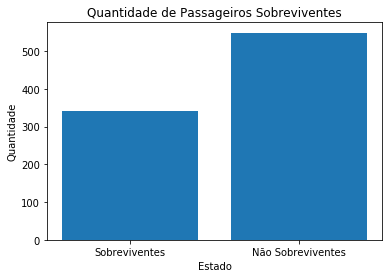

In [45]:
# Grfico de barras, onde as categorias são ordenados da esqueda para a direita. 
plt.bar([1, 2], [df['Survived'].value_counts()["Yes"], df['Survived'].value_counts()["No"]], tick_label=['Sobreviventes', 'Não Sobreviventes'])
plt.title('Quantidade de Passageiros Sobreviventes')
plt.xlabel('Estado')
plt.ylabel('Quantidade');

O gráfico de pizza demonstra esses valores percentualmente, onde 38,4% das pessoas sobreviveram, e 61,6% morreram. 

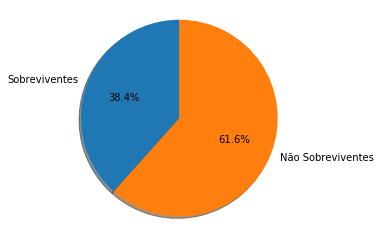

In [17]:
# Gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
labels = 'Sobreviventes', 'Não Sobreviventes'
sizes = [alive,dead]
explode = (0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()




# (2)Qual era o número de passageiros em cada uma das classes?

Como visto abaixo, a maior parte dos passageiros eram da terceira classe. 

In [18]:
# Contabilizar o número de dados '1st' na coluna 'Pclass'.
primeira=df_titanic.Pclass.value_counts()["1st"]
print("Número de passageiros da Primeira Classe:", primeira)

# Contabilizar o número de dados '2nd' na coluna 'Pclass'.
segunda=df_titanic.Pclass.value_counts()["2nd"]
print("\n\nNúmero de passageiros da Segunda Classe:", segunda)

# Contabilizar o número de dados '3rd' na coluna 'Pclass'.
terceira=df_titanic.Pclass.value_counts()["3rd"]
print("\n\nNúmero de passageiros da Terceira Classe:", terceira)


Número de passageiros da Primeira Classe: 216


Número de passageiros da Segunda Classe: 184


Número de passageiros da Terceira Classe: 491


O gráfico de barras mostra que a maior parte dos passageiros se encontravam na terceira classe, seguido das pessoas da primeira classe.

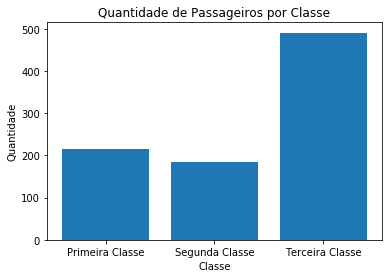

In [19]:
# Grfico de barras, onde as categorias são ordenados da esqueda para a direita. 
locations = [1, 2, 3]
heights = [primeira, segunda, terceira]
labels = ['Primeira Classe', 'Segunda Classe', 'Terceira Classe']
plt.bar(locations, heights, tick_label=labels)
plt.title('Quantidade de Passageiros por Classe')
plt.xlabel('Classe')
plt.ylabel('Quantidade');


O gráfico de pizza mostra que 55,1% das pessoas eram da Terceira Classe, 24,2% das pessoas eram da Primeira Classe e 20,7% das pessoas eram da Segunda Claase. 

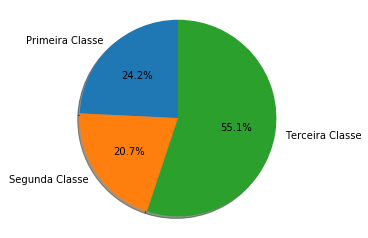

In [20]:
# Gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
labels = 'Primeira Classe', 'Segunda Classe', 'Terceira Classe'
sizes = [primeira, segunda, terceira]
explode = (0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()


# Qual era o número de homens e mulheres abordo?

A maior parte dos passageiros eram homens, compondo 64,8% dos mesmos. 

In [21]:
# Contabilizar o número de dados 'male' na coluna 'Sex'.
man = df_titanic.Sex.value_counts()["male"]
print("Número de homens:", man)

# Contabilizar o número de dados 'female' na coluna 'Sex'.
woman = df_titanic.Sex.value_counts()["female"]
print("Número de mulheres:", woman)

Número de homens: 577
Número de mulheres: 314


Por meio do gráfico de barras vemos que a maior parte dos passageiros eram homens. 

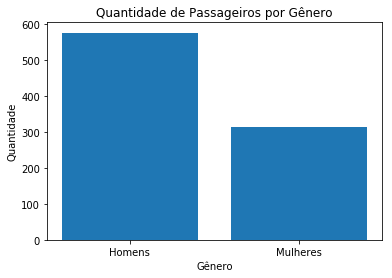

In [22]:
# Grfico de barras, onde as categorias são ordenados da esqueda para a direita. 
locations = [1, 2]
heights = [man,woman]
labels = ['Homens', 'Mulheres']
plt.bar(locations, heights, tick_label=labels)
plt.title('Quantidade de Passageiros por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade');



Por meio desse gráfico vemos que 64,8% dos passageiros eram homens e 35,2% eram mulheres. 

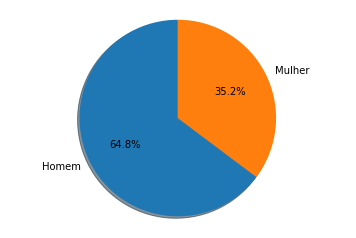

In [23]:
# Gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
labels = 'Homem', 'Mulher'
sizes = [man, woman]
explode = (0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# (4)A classe na qual os passageiros viajavam influenciou em suas chances de sobrevivência?

Podemos inferir que a maior parte dos sobreviventes estavam na primeira classe, enquanto que a maior parte dos mortos eram da terceira classe.


In [24]:
# Contabilizar o número de sobreviventes entre os passageiros da primeira classe.
first_alive = df_titanic.query('Pclass == "1st"').Survived.value_counts()["Yes"]
print('Número de sobreviventes da primeira classe:\n', first_alive)

# Contabilizar o número de mortos entre os passageiros da primeira classe.
first_dead = df_titanic.query('Pclass == "1st"').Survived.value_counts()["No"]
print('Número de mortos da primeira classe:\n', first_dead)

# Contabilizar o número de sobreviventes entre os passageiros da segunda classe.
second_alive = df_titanic.query('Pclass == "2nd"').Survived.value_counts()["Yes"]
print('\n\nNúmero de sobreviventes da segunda classe:\n', second_alive)

# Contabilizar o número de mortes entre os passageiros da segunda classe.
second_dead = df_titanic.query('Pclass == "2nd"').Survived.value_counts()["No"]
print('Número de mortos da segunda classe:\n', second_dead)

# Contabilizar o número de sobreviventes entre os passageiros da terceira classe.
third_alive = df_titanic.query('Pclass == "3rd"').Survived.value_counts()["Yes"]
print('\n\nNúmero de obreviventes da terceira classe:\n', third_alive)

# Contabilizar o número de mortos entre os passageiros da terceira classe.
third_dead = df_titanic.query('Pclass == "3rd"').Survived.value_counts()["No"]
print('Número de mortos da terceira classe:\n', third_dead)

Número de sobreviventes da primeira classe:
 136
Número de mortos da primeira classe:
 80


Número de sobreviventes da segunda classe:
 87
Número de mortos da segunda classe:
 97


Número de obreviventes da terceira classe:
 119
Número de mortos da terceira classe:
 372


O gráfico de barras mostra que a maior parte das pessoas eram da terceira classe e morrera. 

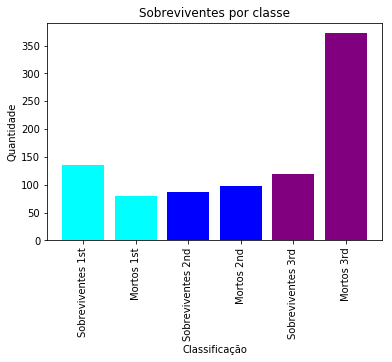

In [25]:
# Grfico de barras, onde as categorias são ordenados da esqueda para a direita. 
locations = [1, 2,3,4,5,6]
heights = [first_alive, first_dead, second_alive, second_dead, third_alive, third_dead]
labels = ['Sobreviventes 1st', 'Mortos 1st', 'Sobreviventes 2nd', 'Mortos 2nd', 'Sobreviventes 3rd', 'Mortos 3rd']
plt.bar(locations, heights, tick_label=labels, color=['cyan', 'cyan','blue','blue','purple','purple'])
plt.title('Sobreviventes por classe')
plt.xlabel('Classificação')
plt.ylabel('Quantidade')
plt.xticks(rotation = 'vertical');



67,8% dos mortos eram passageiros da terceira classe, enquanto que a primeira classe teve o menor número percentual de atingidos. 

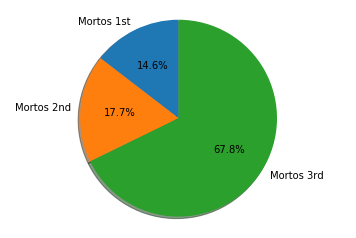

In [26]:
# Gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
labels = 'Mortos 1st', 'Mortos 2nd','Mortos 3rd'
sizes =[first_dead,  second_dead,  third_dead]
explode = (0, 0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Entre os sobreviventes, a primeira classe foi a que teve o maior número de representantes. 

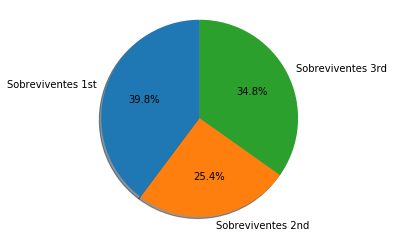

In [27]:
# Gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
labels = 'Sobreviventes 1st', 'Sobreviventes 2nd','Sobreviventes 3rd'
sizes =[first_alive,  second_alive,  third_alive]
explode = (0, 0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# (5) O gênero dos passageiros influenciou em suas chances de sobrevivência?

As mulheres, mesmo representando um menor número de passageiros (como visto na questão 3), tiveram um número absoluto de sobreviventes maior do que dos homens, assim como percentual. 

In [28]:
# Contabilizar o número de sobreviventes entre homens.
m_alive = df_titanic.query('Sex == "male"').Survived.value_counts()["Yes"]
print('Número de sobreviventes do sexo masculino: \n', m_alive)

# Contabilizar o número de mortos entre homens
m_dead = df_titanic.query('Sex == "male"').Survived.value_counts()["No"]
print('Número de mortos do sexo masculino: \n', m_dead)

# Contabilizar o número de sobreviventes entre mulheres
f_alive = df_titanic.query('Sex == "female"').Survived.value_counts()["Yes"]
print('\n\nNúmero de sobreviventes do sexo feminino: \n', f_alive)

# Contabilizar o número de mortos entre mulheres
f_dead = df_titanic.query('Sex == "female"').Survived.value_counts()["No"]
print('Número de mortos do sexo feminino: \n', f_dead)

Número de sobreviventes do sexo masculino: 
 109
Número de mortos do sexo masculino: 
 468


Número de sobreviventes do sexo feminino: 
 233
Número de mortos do sexo feminino: 
 81


O gráfico de barras abaixo mostra que, ao classificar os passageiros por gênero e status de sobrevivência, a maior parte das pessoas eram homens e morreram. Mulheres mortas tiveram o menor número de representantes. 

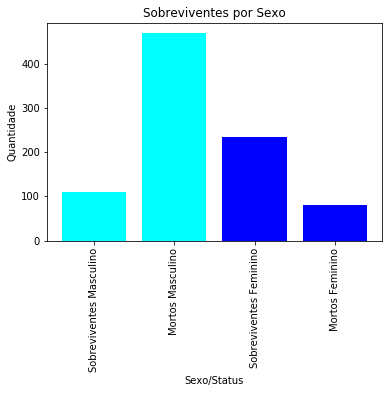

In [29]:
# Grfico de barras, onde as categorias são ordenados da esqueda para a direita. 
locations = [1, 2,3,4]
heights = [m_alive, m_dead, f_alive, f_dead]
labels = ['Sobreviventes Masculino', 'Mortos Masculino', 'Sobreviventes Feminino', 'Mortos Feminino']
plt.bar(locations, heights, tick_label=labels, color=['cyan', 'cyan','blue','blue'], )
plt.title('Sobreviventes por Sexo')
plt.xlabel('Sexo/Status')
plt.ylabel('Quantidade')
plt.xticks(rotation = 'vertical');


As mulheres representaram 68,1% dos sobreviventes, enquanto os homens representaram 31,9%. 

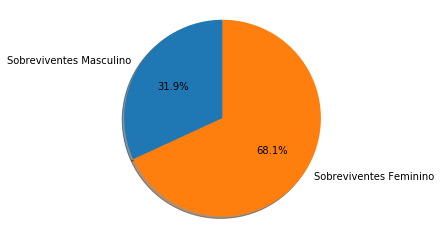

In [30]:
# Gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
labels = 'Sobreviventes Masculino','Sobreviventes Feminino'
sizes = [m_alive,f_alive]
explode = (0,0) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()


Entre os mortos, os homens representavam 85,2%, enquanto que as mulheres representavam 14,8%.

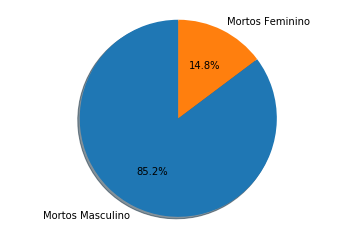

In [31]:
# Gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
labels = 'Mortos Masculino','Mortos Feminino'
sizes = [m_dead,f_dead]
explode = (0,0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

# (6) Qual a relação dos fatores classe e gênero, combinados, nas chances de sobrevivência dos passageiros?

Homens da terceira classe representaram o maior número de pessoas entre os mortos. Mulheres da primeira classe representaram o maior número de sobreviventes. 

In [32]:
# Contabilizar o número de sobreviventes entre homens da primeira classe
m1_alive=df_titanic.query('Pclass == "1st" and Sex == "male"').Survived.value_counts()["Yes"]
print('Número de sobreviventes do sexo masculino da primeira classe: \n', m1_alive)

# Contabilizar o número de mortos entre homens da primeira classe
m1_dead=df_titanic.query('Pclass == "1st" and Sex == "male"').Survived.value_counts()["No"]
print('Número de mortos do sexo masculino da primeira classe: \n', m1_dead)

# Contabilizar o número de vivos entre mulheres da primeira classe
f1_alive=df_titanic.query('Pclass == "1st" and Sex == "female"').Survived.value_counts()["Yes"]
print('\n\nNúmero de sobreviventes do sexo feminino da primeira classe: \n', f1_alive)

# Contabilizar o número de mortos entre mulheres da primeira classe
f1_dead=df_titanic.query('Pclass == "1st" and Sex == "female"').Survived.value_counts()["No"]
print('Número de mortos do sexo feminino da primeira classe: \n', f1_dead)

# Contabilizar o número de vivos entre homens da primeira classe
m2_alive=df_titanic.query('Pclass == "2nd" and Sex == "male"').Survived.value_counts()["Yes"]
print('\n\nNúmero de sobreviventes do sexo masculino da segunda classe: \n', m2_alive)

# Contabilizar o número de mortos entre homens da segunda classe
m2_dead=df_titanic.query('Pclass == "2nd" and Sex == "male"').Survived.value_counts()["No"]
print('Número de mortos do sexo masculino da segunda classe: \n', m2_dead)

# Contabilizar o número de vivos entre mulheres da segunda classe
f2_alive=df_titanic.query('Pclass == "2nd" and Sex == "female"').Survived.value_counts()["Yes"]
print('\n\nNúmero de sobreviventes do sexo feminino da segunda classe: \n', f2_alive)

# Contabilizar o número de mortos entre mulheres da segunda classe
f2_dead=df_titanic.query('Pclass == "2nd" and Sex == "female"').Survived.value_counts()["No"]
print('Número de mortos do sexo feminino da seunda classe: \n', f2_dead)

# Contabilizar o número de vivos entre homens da terceira classe
m3_alive=df_titanic.query('Pclass == "3rd" and Sex == "male"').Survived.value_counts()["Yes"]
print('\n\nNúmero de sobreviventes do sexo masculino da terceira classe: \n', m3_alive)

# Contabilizar o número de mortos entre homens da terceira classe
m3_dead=df_titanic.query('Pclass == "3rd" and Sex == "male"').Survived.value_counts()["No"]
print('Número de mortos do sexo masculino da terceira classe: \n', m3_dead)

# Contabilizar o número de vivos entre mulheres da terceira classe
f3_alive=df_titanic.query('Pclass == "3rd" and Sex == "female"').Survived.value_counts()["Yes"]
print('\n\nNúmero de sobreviventes do sexo feminino da terceira classe: \n', f3_alive)

# Contabilizar o número de mortos entre mulheres da terceira classe
f3_dead=df_titanic.query('Pclass == "3rd" and Sex == "female"').Survived.value_counts()["No"]
print('Número de mortos do sexo feminino da terceira classe: \n', f3_dead)

Número de sobreviventes do sexo masculino da primeira classe: 
 45
Número de mortos do sexo masculino da primeira classe: 
 77


Número de sobreviventes do sexo feminino da primeira classe: 
 91
Número de mortos do sexo feminino da primeira classe: 
 3


Número de sobreviventes do sexo masculino da segunda classe: 
 17
Número de mortos do sexo masculino da segunda classe: 
 91


Número de sobreviventes do sexo feminino da segunda classe: 
 70
Número de mortos do sexo feminino da seunda classe: 
 6


Número de sobreviventes do sexo masculino da terceira classe: 
 47
Número de mortos do sexo masculino da terceira classe: 
 300


Número de sobreviventes do sexo feminino da terceira classe: 
 72
Número de mortos do sexo feminino da terceira classe: 
 72


Classificando os passageiros do navio por gênero, classe e se sobreviveram ou não, o gráfico abaixo mostra que a maior parte das pessoas eram homens da terceira classe que faleceram. Na outra ponta estão mulheres mortas da primeira classe. 

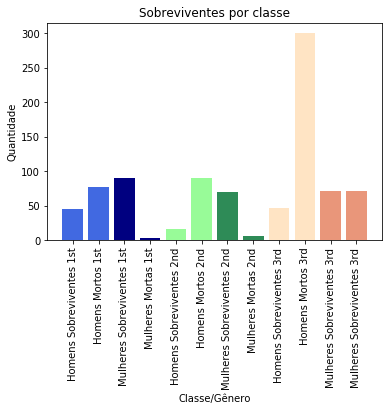

In [33]:
# Grfico de barras, onde as categorias são ordenados da esqueda para a direita. 
locations = [1, 2,3,4,5,6,7,8,9,10,11,12]
heights = [m1_alive, m1_dead, f1_alive, f1_dead, m2_alive, m2_dead,f2_alive, f2_dead, m3_alive, m3_dead, f3_alive, f3_dead]
labels = ['Homens Sobreviventes 1st', 'Homens Mortos 1st', 'Mulheres Sobreviventes 1st', 'Mulheres Mortas 1st', 'Homens Sobreviventes 2nd', 'Homens Mortos 2nd','Mulheres Sobreviventes 2nd', 'Mulheres Mortas 2nd', 'Homens Sobreviventes 3rd', 'Homens Mortos 3rd', 'Mulheres Sobreviventes 3rd', 'Mulheres Sobreviventes 3rd']
plt.bar(locations, heights, tick_label=labels, color=['royalblue', 'royalblue','navy','navy','palegreen','palegreen','seagreen', 'seagreen','bisque','bisque','darksalmon','darksalmon' ])
plt.title('Sobreviventes por classe')
plt.xlabel('Classe/Gênero')
plt.ylabel('Quantidade')
plt.xticks(rotation = 'vertical');



Este gráfico demonstra que mulheres da primeira classe representaram 26,6% dos sobreviventes. Mulheres da segunda e terceira classe tiveram maior participação entre os sobreviventes do que homens de qualquer uma das três classes.

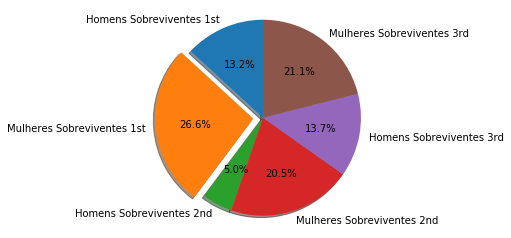

In [34]:
# Gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
labels = 'Homens Sobreviventes 1st', 'Mulheres Sobreviventes 1st', 'Homens Sobreviventes 2nd','Mulheres Sobreviventes 2nd', 'Homens Sobreviventes 3rd', 'Mulheres Sobreviventes 3rd'
sizes = [m1_alive, f1_alive, m2_alive, f2_alive, m3_alive, f3_alive]
explode = (0, 0.1,0,0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Este gráfico demonstra que 0,5% dos mortos eram passageiras mulheres da primeira classe. Homens da terceira classe representavam 54,6% dos mortos.  

Percentualmente, homens da primeira classe tiveram um número de mortos significamente maior do que o de mulheres da segunda e terceira classe. 


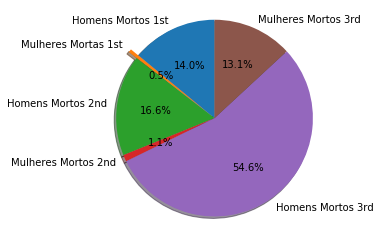

In [35]:
# Gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
labels = 'Homens Mortos 1st', 'Mulheres Mortas 1st', 'Homens Mortos 2nd','Mulheres Mortos 2nd', 'Homens Mortos 3rd', 'Mulheres Mortos 3rd'
sizes = [m1_dead, f1_dead, m2_dead, f2_dead, m3_dead, f3_dead]
explode = (0, 0.1,0,0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Entre os passageiros da primeira classe, 37% das pessoas morreram.

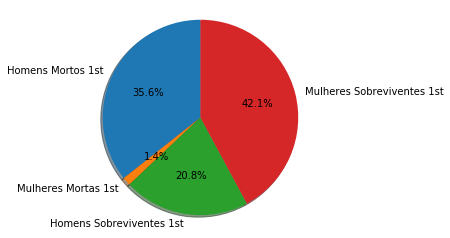

In [36]:
# Gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
labels = 'Homens Mortos 1st', 'Mulheres Mortas 1st', 'Homens Sobreviventes 1st','Mulheres Sobreviventes 1st'
sizes = [m1_dead, f1_dead, m1_alive, f1_alive]
explode = (0, 0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Entre os sobreviventes da primeira classe, 66,9% desses eram mulheres e 33,1% eram homens.

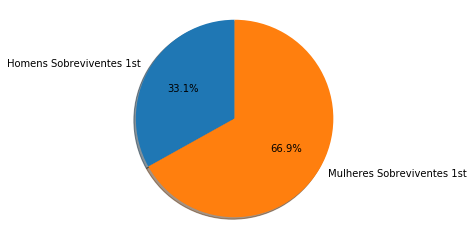

In [37]:
# Gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
labels = 'Homens Sobreviventes 1st','Mulheres Sobreviventes 1st'
sizes = [ m1_alive, f1_alive]
explode = (0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Das 37% das pessoas que morreram da Primeira Claase, 96,2% eram homens e 3,8% eram mulheres, como visto no gráfico abaixo.

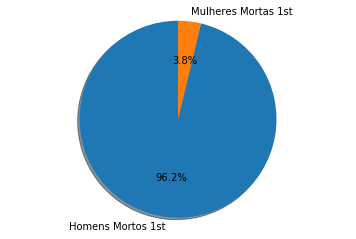

In [38]:
# Gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
labels = 'Homens Mortos 1st', 'Mulheres Mortas 1st'
sizes = [m1_dead, f1_dead]
explode = (0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Entre os passageiros da segunda classe, 52,8% das pessoas morreram.  Entre os sobreviventes dessa classe (39,2%) 80,5% eram mulheres e 19,5% eram homens.


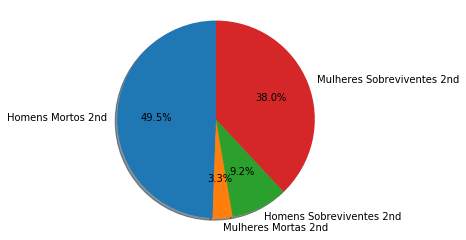

In [39]:
# Gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
labels = 'Homens Mortos 2nd', 'Mulheres Mortas 2nd', 'Homens Sobreviventes 2nd','Mulheres Sobreviventes 2nd'
sizes = [m2_dead, f2_dead, m2_alive, f2_alive]
explode = (0, 0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Entre os mortos, 93,8%  eram homens e 6,2% mulheres.

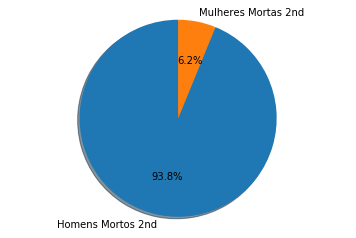

In [40]:
# Gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
labels = 'Homens Mortos 2nd', 'Mulheres Mortas 2nd'
sizes = [m2_dead, f2_dead]
explode = (0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Entre os sobreviventes 19,5% eram homens e 80,5% eram mulheres. 

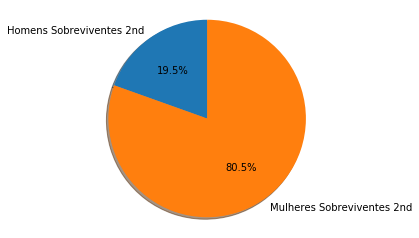

In [41]:
# Gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
labels = 'Homens Sobreviventes 2nd','Mulheres Sobreviventes 2nd'
sizes = [m2_alive, f2_alive]
explode = (0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Entre os passageiros da terceira classe, 75,8% das pessoas morreram.


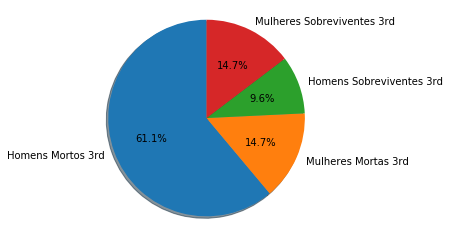

In [42]:
# Gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
labels = 'Homens Mortos 3rd', 'Mulheres Mortas 3rd', 'Homens Sobreviventes 3rd','Mulheres Sobreviventes 3rd'
sizes = [m3_dead, f3_dead, m3_alive, f3_alive]
explode = (0, 0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

80,6% desses eram homens e 19,4% mulheres. 

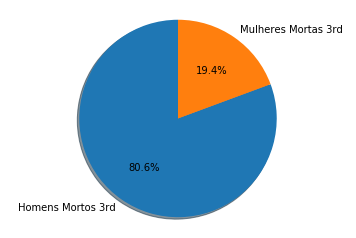

In [43]:
# Gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
labels = 'Homens Mortos 3rd', 'Mulheres Mortas 3rd'
sizes = [m3_dead, f3_dead]
explode = (0, 0,)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

 Entre os sobreviventes dessa classe (24,2%) 60,5% eram mulheres e 39,5% eram homens.

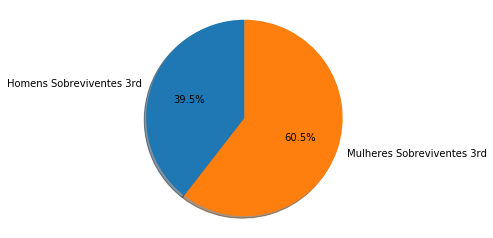

In [44]:
# Gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
labels = 'Homens Sobreviventes 3rd','Mulheres Sobreviventes 3rd'
sizes = [ m3_alive, f3_alive]
explode = (0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# 6 Conclusões

A partir da análise feita e dos resultados apresentados, podemos concluir que gênero e status socio-econômico influenciaram nas chances de sobrevivência dos passageiros, dado mulheres cuja classe no navio era mais alta tiveram uma maior taxa de sobrevivência.  

Porém, essa conclusão não é definitiva, uma vez que outros fatores, cujo dados não temos acesso, podem ter influenciado na sobrevivência dos passageiros. Entre eles, por exemplo, está a indicação de quais pessoas no *dataset* seriam passageiros e quais seriam tripulantes. 

Vale lembrar, também, que o conjunto de dados analisado possui apenas 891 amostras, sendo que o navio tinha cerca de 2200 pessoas. 

# 7.Fontes

1. https://www.kaggle.com/c/titanic/data

2. https://stackoverflow.com/

3.https://matplotlib.org

4.https://pandas.pydata.org

5.https://www.youtube.com/channel/UCnVzApLJE2ljPZSeQylSEyg

